In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/IBM_Stock_1980_2025.csv", parse_dates=["Date"])
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor
0,1980-01-02,15.057361,15.415870,14.937859,14.937859,0.965845,"1,723,808",0.0,0.0,0.064657
1,1980-01-03,14.937859,15.176864,14.639101,15.176864,0.981298,"2,553,495",0.0,0.0,0.064657
2,1980-01-04,15.176864,15.236616,15.057361,15.146989,0.979366,"1,978,195",0.0,0.0,0.064657
3,1980-01-07,15.146989,15.146989,14.967734,15.087237,0.975503,"1,480,718",0.0,0.0,0.064657
4,1980-01-08,15.087237,16.132887,14.967734,16.103010,1.041180,"2,968,130",0.0,0.0,0.064657


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11488 entries, 0 to 11487
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          11488 non-null  datetime64[ns]
 1   Open          11488 non-null  float64       
 2   High          11488 non-null  float64       
 3   Low           11488 non-null  float64       
 4   Close         11488 non-null  float64       
 5   Adj Close     11488 non-null  float64       
 6   Volume        11488 non-null  object        
 7   Dividends     11488 non-null  float64       
 8   Stock Splits  11488 non-null  float64       
 9   Adj Factor    11488 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 897.6+ KB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,11488,2002-10-04 06:31:57.827298048,1980-01-02 00:00:00,1991-05-12 06:00:00,2002-09-30 12:00:00,2014-02-27 06:00:00,2025-07-30 00:00:00,NaN
Open,11488.0,86.395437,9.799235,27.605164,84.57457,132.660133,294.549988,59.715942
High,11488.0,87.205402,9.978489,27.844168,85.468452,133.749996,296.160004,60.191946
Low,11488.0,85.627898,9.709608,27.336281,83.742832,131.791824,290.359985,59.273661
Close,11488.0,86.434003,9.799235,27.605164,84.694077,132.79636,294.779999,59.765258
Adj Close,11488.0,50.850399,0.800124,2.569202,42.76579,93.500592,294.779999,52.400382
Dividends,11488.0,0.009136,0.0,0.0,0.0,0.0,1.68,0.100572
Stock Splits,11488.0,0.00044,0.0,0.0,0.0,0.0,2.0,0.028146
Adj Factor,11488.0,0.411739,0.064657,0.104355,0.504918,0.597871,1.0,0.284595


In [6]:
print("Duplicados:", df.duplicated().sum())
print("Valores faltantes por columna:\n", df.isna().sum())


Duplicados: 0
Valores faltantes por columna:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Adj Factor      0
dtype: int64


In [7]:

# --- 4. Limpieza inicial
# Convertir columna Volume (string con comas) a numérico
df["Volume"] = df["Volume"].astype(str).str.replace(",", "").astype(float)
df["Volume"] = df["Volume"].fillna(df["Volume"].median())


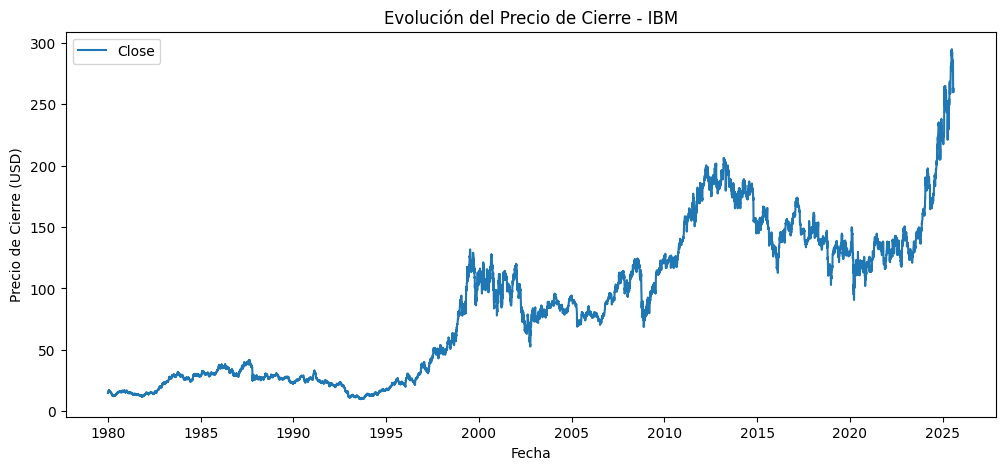

In [8]:

# --- 5. Gráficos básicos
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], label="Close")
plt.title("Evolución del Precio de Cierre - IBM")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.show()


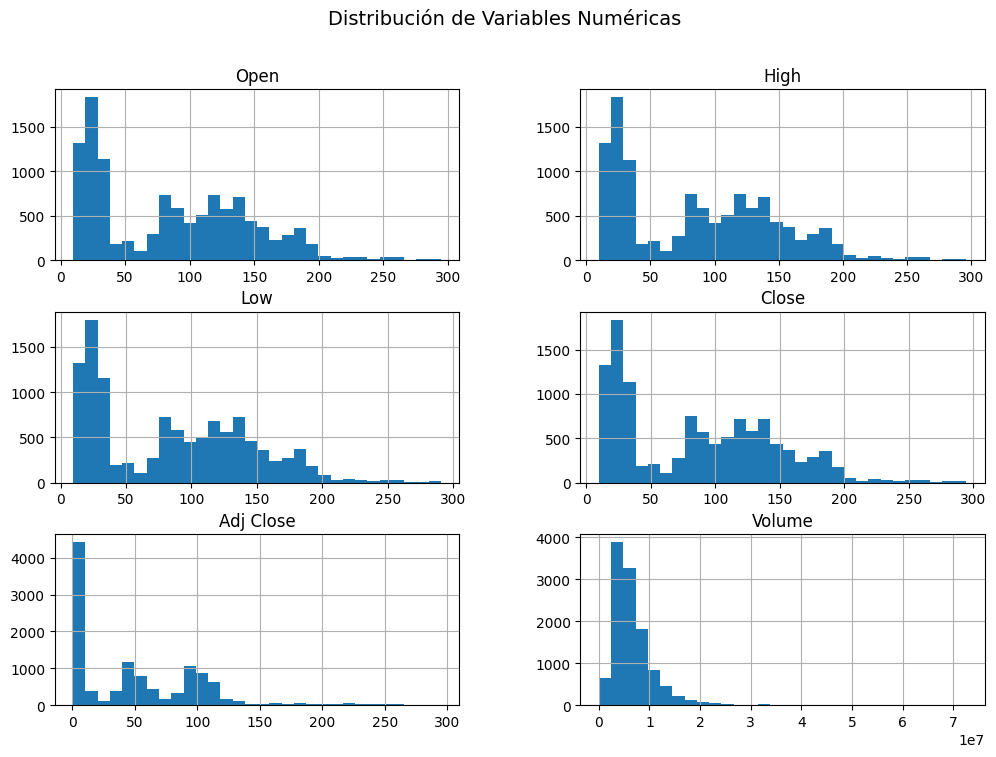

In [9]:

# --- 6. Histogramas y distribuciones
num_cols = ["Open","High","Low","Close","Adj Close","Volume"]
df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribución de Variables Numéricas", fontsize=14)
plt.show()


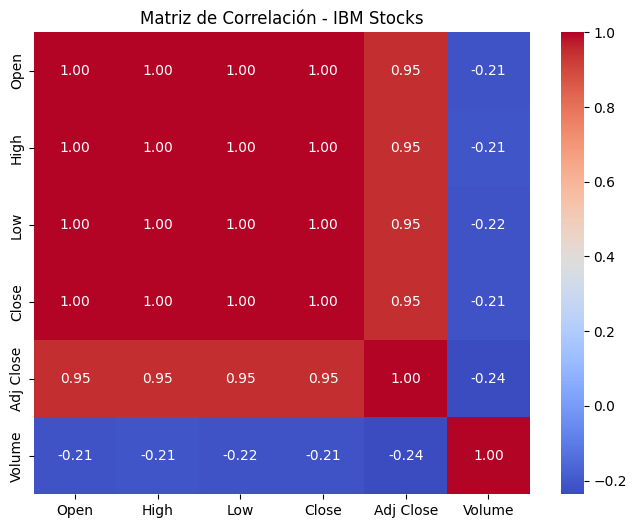

In [10]:

# --- 7. Correlaciones
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - IBM Stocks")
plt.show()



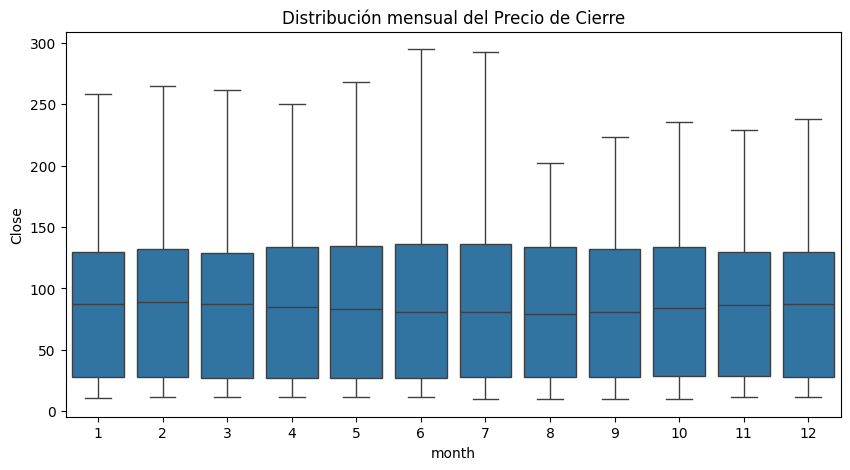

In [11]:

# --- 8. Features temporales
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["dayofweek"] = df["Date"].dt.dayofweek

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="month", y="Close")
plt.title("Distribución mensual del Precio de Cierre")
plt.show()


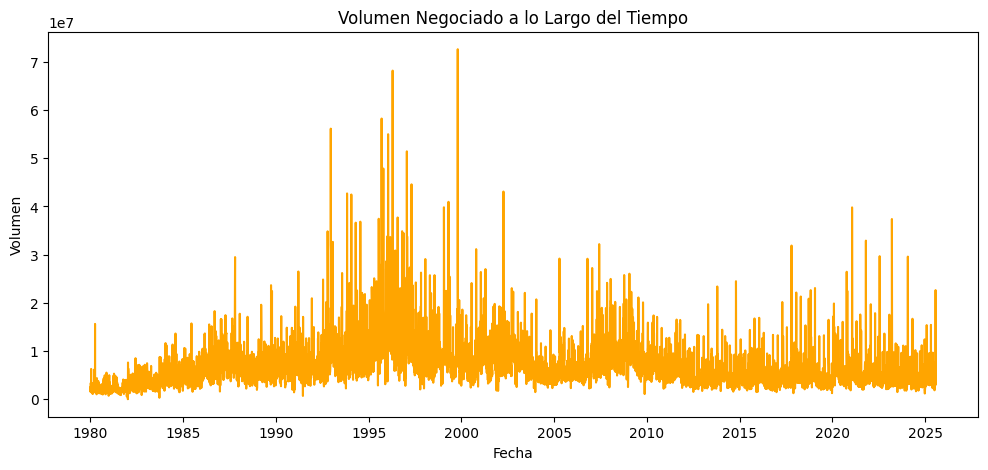

In [12]:

# --- 9. Evolución del volumen negociado
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Volume"], color="orange")
plt.title("Volumen Negociado a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.show()





### Conclusiones EDA

- No se detectan valores faltantes significativos.
- Variables altamente correlacionadas entre sí (`Open`, `High`, `Low`, `Close`).
- `Volume` requiere limpieza por formato string.
- Se observa fuerte crecimiento del precio desde 1980 a 2025.
- Estacionalidad moderada por mes.
- Feature engineering sugerido:
  - Variables temporales (`year`, `month`, `dayofweek`).
  - Promedios móviles (`Close_7d_mean`, `Close_30d_mean`).
  - Retornos y volatilidad.
